### ex7 PCA: Principal component analysis

In this exercise, we first experiment with an example of 2D dataset to get intuition on how PCA works, then we use it on a bigger data set of 5000 faces.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.optimize import minimize
from scipy.io import loadmat
import scipy.linalg as linalg

#### Part I : Load example data set

In [3]:
mat = loadmat('ex7data1.mat')
print(type(mat))
print(mat.keys())
X = mat["X"]
print('Dimension of X is: ', X.shape)

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'X'])
Dimension of X is:  (50, 2)


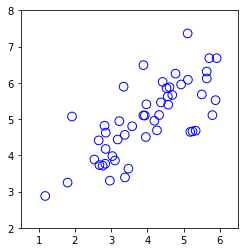

In [4]:
plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors='b')
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal', adjustable='box') # make the plot to show as square

#### Part 2: Principal Component Analysis


In [5]:
def featureNormalize(X):
    mu=X.mean(axis=0)
    sigma=X.std(axis=0, ddof=1)
    X_norm=(X-mu)/sigma
    return X_norm, mu, sigma

In [6]:
#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)
print(mu)
print(sigma)

[3.98926528 5.00280585]
[1.17304991 1.02340778]


In [7]:
def pca(X_norm):
    m,n=X.shape
    cov=1/m*np.dot(X_norm.T, X_norm)
    U,S,V=np.linalg.svd(cov)
    S = linalg.diagsvd(S, len(S), len(S))
    return U,S,V

U, S,V = pca(X_norm)

In [8]:
import matplotlib.pyplot as plt

def drawLine(p1, p2, **kwargs):
#   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the current figure
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], **kwargs)
    # [p1[0], p2[0]] is the x part
    # [p1[1], p2[1]] is the y part

Top eigenvector: 

 U(:,0) =  -0.707107 -0.707107

(you should expect to see -0.707107 -0.707107)



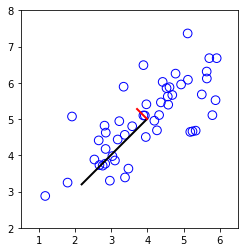

In [9]:
#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors='b')
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal', adjustable='box')

drawLine(mu, mu + 1.5 * S[0,0] * U[:,0].T, c='k', linewidth=2)
drawLine(mu, mu + 1.5 * S[1,1] * U[:,1].T, c='r', linewidth=2)

print('Top eigenvector: \n');
print(' U(:,0) = ', round(U[0,0],6), round(U[1,0],6));
print('\n(you should expect to see -0.707107 -0.707107)\n');

#### Part 3: Dimension Reduction

We will implement the projection step to map the data onto the  first k eigenvectors and also plot the data in this reduced dimensional space. This will show us what the data looks like when using only the corresponding eigenvectors to reconstruct it.

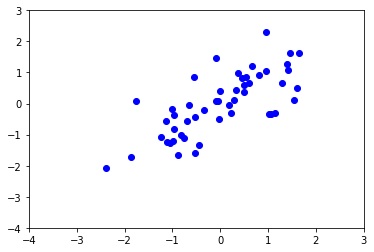

In [10]:
#  Plot the normalized dataset (returned from pca)
plt.scatter(X_norm[:,0], X_norm[:,1], color='b', marker='o');
plt.axis([-4, 3, -4, 3]); 

In [11]:
def projectData(X, U, K):
#   Z = projectData(X, U, K) computes the projection of 
#   the normalized inputs X into the reduced dimensional space spanned by
#   the first K columns of U. It returns the projected examples in Z.

# You need to return the following variables correctly.
    Z = np.zeros((X.shape[0], K));
    Z=np.dot(X, U[:,0:K])
    return Z

In [12]:
#  Project the data onto K = 1 dimension
K = 1;
Z = projectData(X_norm, U, K);
print('Projection of the first example: {:f}'.format(Z[0,0]))
print('\n(this value should be about 1.481274)');

Projection of the first example: 1.481274

(this value should be about 1.481274)


In [13]:
def recoverData(Z, U, K):
#   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the 
#   original data that has been reduced to K dimensions. It returns the
#   approximate reconstruction in X_rec.

    X_rec=np.zeros((Z.shape[0], U.shape[0]))
    X_rec=Z.dot(U[:,0:K].T)
    return X_rec            

In [14]:
X_rec  = recoverData(Z, U, K);
print('Approximation of the first example: {:f} {:f}\n'.format(X_rec[0,0], X_rec[0,1]));
print('\n(this value should be about  -1.047419 -1.047419)');

Approximation of the first example: -1.047419 -1.047419


(this value should be about  -1.047419 -1.047419)


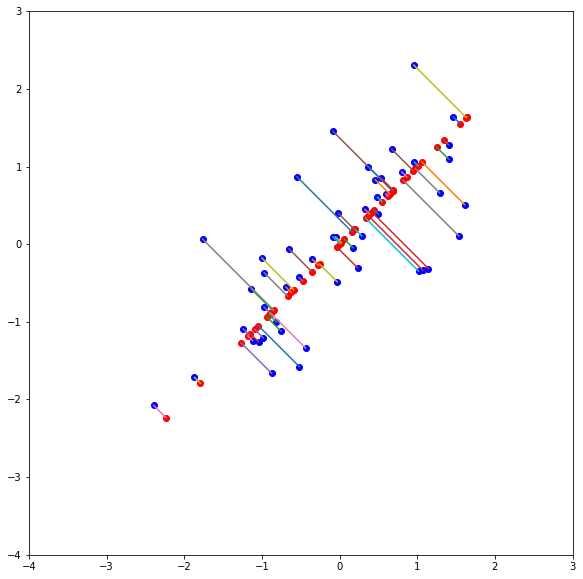

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(X_norm[:,0], X_norm[:,1], color='b', marker='o');
plt.axis([-4, 3, -4, 3]); 
#  Draw lines connecting the projected points to the original points
plt.scatter(X_rec[:,0], X_rec[:,1], color='r', marker='o');
for i in range(X_norm.shape[0]):
    drawLine(X_norm[i,:], X_rec[i,:]);
plt.gca().set_aspect('equal', adjustable='box')

#### Part 4: Loading and Visualizing Face Data

We run PCA on face images to see how it can be used in practice for dimension reduction. The ex7faces.mat contains a dataset X of face images, each 32 X 32 in grayscale. Each row of X corresponds to one face image (a row vector of length 1024). 

In [16]:
#  Load Face dataset
face=loadmat('ex7faces.mat')
X=face['X']
print(X.shape)

(5000, 1024)


In [17]:
def displayData(X, example_width):
    """
    [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data  stored in X in a nice grid. 
    It returns the figure handle h and the display array if requested
    """
    # closes previously opened figure. Prevent a warning after open too many figures
    plt.close()
    # Create new figure
    plt.figure(figsize=(7,7))
    
# Turn 1-D X array into 2D
    if X.ndim==1:
        X=np.reshape(X,(-1,X.shape[0]))
    
# Set example_width automatically if not passed in
    if not example_width or not "example_width" in locals():
        example_width=int(round(math.sqrt(X.shape[1])))

# Gray Image
    plt.set_cmap("gray")

# Compute rows, cols
    m,n=X.shape
    example_height = int((n / example_width))

# Compute number of items to display
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))

# Between images padding
    pad = 1;

# Setup blank display
    display_array = - np.ones((int(pad + display_rows * (example_height + pad)),int(pad + display_cols * (example_width + pad))))

# Copy each example into a patch on the display array
    curr_ex = 1;
    for j in range(1,display_rows+1):
        for i in range(1,display_cols+1):
            if curr_ex > m:
                break; 

# Get the max value of the patch
            max_val = max(abs(X[curr_ex-1, :]))
            rows=pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols=pad + (i - 1) * (example_width + pad) + np.array(range(example_width))
    
            display_array[rows[0]:rows[-1]+1, cols[0]:cols[-1]+1]=np.reshape(X[curr_ex-1,:],(example_height, example_width), order='F')/max_val
            curr_ex+=1
        if curr_ex>m:
            break
    h=plt.imshow(display_array,vmin=-1, vmax=1)
    
    # do not show axis
    plt.axis('off')
    plt.show(block=False)

    return h, display_array

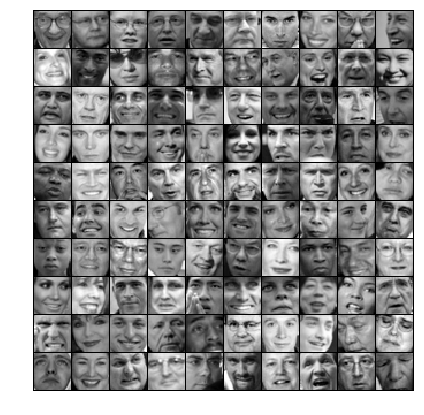

In [18]:
#  Display the first 100 faces in the dataset
displayData(X[0:100,:], example_width=False);

#### Part 5:  PCA on Face Data: Eigenfaces

Each PCA in U is a vector of length n, where for the face data n=1024. We can visualize then into a 32*32 matrix that corresponds to the pixels in the original dataset. And we only display the first 36 principal components that describes the largest variation. 

(2, 2)
(1024,)
(1024,)


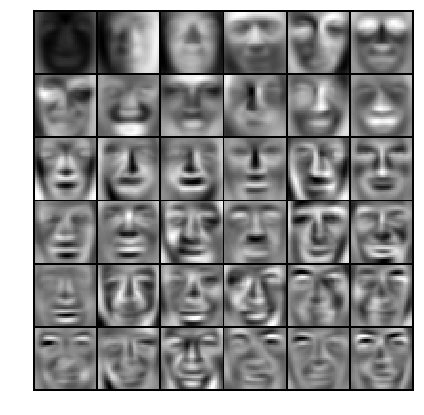

In [19]:
#  Before running PCA, it is important to first normalize X by subtracting 
#  the mean value from each feature and divided by the standard deviation
[X_norm, mu, sigma] = featureNormalize(X);

print(U.shape)
print(mu.shape)
print(sigma.shape)

#  Run PCA
[U, S, V] = pca(X_norm);

#  Visualize the top 36 eigenvectors found
displayData(U[:,0:36].T, example_width=False);

#### Part 6 Dimension Reduction for Faces

Now that you have computed the principal components for the face dataset, you can use it to reduce the dimensions of the face dataset. This allows you to use your learning algorithm with a smaller impute size (100 dimensions) instead of the original 1024 dimensions. This can help speed up your learning algorithm.

In [20]:
print('\nDimension reduction for face dataset.');

K = 100;
Z = projectData(X_norm, U, K);

print('The projected data Z has a size of: ')
print('{:d} {:d} '.format(Z.shape[0], Z.shape[1]));


Dimension reduction for face dataset.
The projected data Z has a size of: 
5000 100 


#### Part 7: Visualization of Faces after PCA Dimension Reduction 

To understand what is lost in the dimension reduction, we can recover the data using only the projected dataset. An approximate recovery of the data is performed and the original and projected face images are displayed side by side.


Visualizing the projected (reduced dimension) faces.


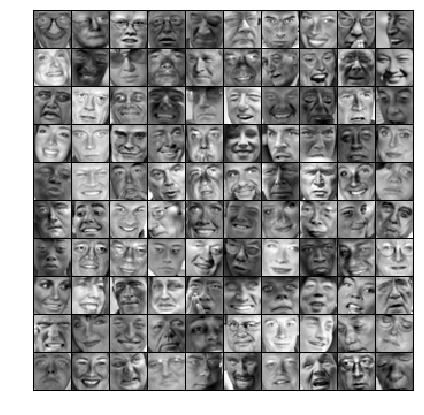

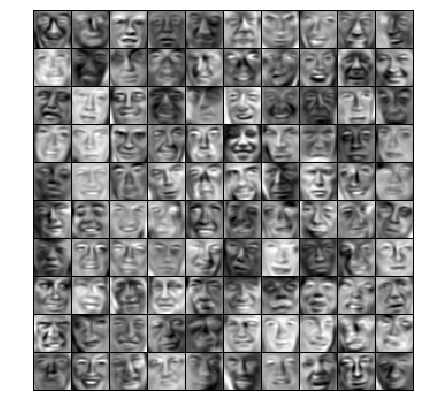

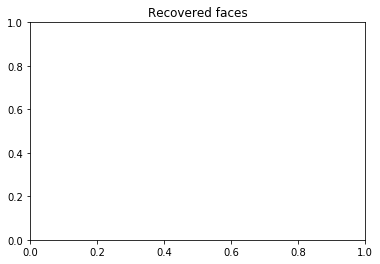

In [21]:
print('\nVisualizing the projected (reduced dimension) faces.');

K = 100;
X_rec  = recoverData(Z, U, K);

# Display normalized data
plt.subplot(2, 1, 1);
displayData(X_norm[0:100,:], example_width=False);
plt.title('Original faces');

# Display reconstructed data from only k eigenfaces
plt.subplot(2, 1, 2);
displayData(X_rec[0:100,:], example_width=False);
plt.title('Recovered faces');

#### Part 8(a): Optional (ungraded) Exercise: PCA for Visualization 

One useful application of PCA is to use it to visualize high-dimensional data. In the last K-Means exercise we ran K-Means on 3-dimensional pixel colors of an image. We first visualize this output in 3D, and then apply PCA to obtain a visualization in 2D.

In [52]:
from scipy.misc import imread
A=imread('bird_small.png')
A.shape

C:\Users\zhang\Anaconda3 new\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


(128, 128, 3)

In [53]:
A = A / 255;
img_size = A.shape;
X = np.reshape(A, (img_size[0] * img_size[1], 3));
K = 16; 
max_iters = 10;

In [54]:
def kMeansInitCentroids(X, K):
    m,n=X.shape
    choose=np.random.permutation(m)
    centroids = np.zeros((K, X.shape[1]));
    centroids=X[choose[0:K], :]
    return centroids

In [55]:
import numpy as np
from matplotlib import colors

def hsv(n=63):
    return colors.hsv_to_rgb( np.column_stack([ np.linspace(0, 1, n+1)            , np.ones( ((n+1), 2) ) ]) )

In [56]:
import matplotlib.pyplot as plt
import numpy as np

def plotDataPoints(X, idx, K):
    palette = hsv( K )
    colors = np.array([palette[int(i)] for i in idx])
    plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors=colors)
    return

In [57]:
def drawLine(p1, p2, **kwargs):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], **kwargs)

In [58]:
def plotProgresskMeans(X, centroids, previous, idx, K, i):
    plotDataPoints(X, idx, K);
# Plot the centroids as black x's
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='k')
# Plot the history of the centroids with lines
    for j in range(centroids.shape[0]):
        drawLine(centroids[j, :], previous[j, :], c='b')
    plt.title(print('Iteration number:', i))

In [59]:
def computeCentroids(X, idx, K):
    m,n=X.shape
    centroids = np.zeros((K, n));
    for i in range(K):
        centroids[i,:]=np.array([X[np.where(idx.reshape(-1,)==i)].mean(axis=0)])
    return centroids

In [60]:
# Find the closest centroids for the examples using the initial_centroids
def findClosestCentroids(X, centroids):

# Set K
    K = centroids.shape[0];

    idx = np.zeros((X.shape[0],1));

    for i in range(X.shape[0]):
        disc=1000000000000
        for j in range(K):
            if np.dot((X[i,:]-centroids[j,:]).T, (X[i,:]-centroids[j,:]))<disc:
                disc=np.dot((X[i,:]-centroids[j,:]).T, (X[i,:]-centroids[j,:]))
                idx[i]=j
    return idx

In [61]:
def runkMeans(X, initial_centroids, max_iters, plot_progress): 
                                      
    m,n=X.shape
    K=initial_centroids.shape[0]
    centroids = initial_centroids;
    previous_centroids = centroids;
    idx = np.zeros((m, 1));

# Run K-Means
    for i in range(max_iters):
    
    # Output progress
        print('K-Means iteration \n', i, max_iters);
    
    # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids);
           
    # Optionally, plot progress here
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i);
            previous_centroids = centroids;
            # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K); 
    
    return centroids, idx

In [62]:
initial_centroids = kMeansInitCentroids(X, K);
[centroids, idx] = runkMeans(X, initial_centroids, max_iters, plot_progress=False);

K-Means iteration 
 0 10
K-Means iteration 
 1 10
K-Means iteration 
 2 10
K-Means iteration 
 3 10
K-Means iteration 
 4 10
K-Means iteration 
 5 10
K-Means iteration 
 6 10
K-Means iteration 
 7 10
K-Means iteration 
 8 10
K-Means iteration 
 9 10


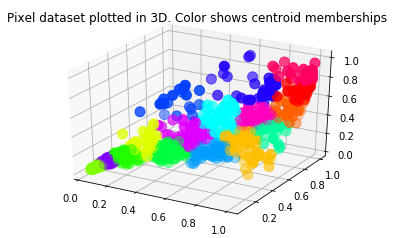

In [63]:
#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
sel = (np.floor(np.random.rand(1000, 1) * X.shape[0])).astype(int).flatten();
#  Setup Color Palette
from matplotlib import colors
palette = hsv(K);
colors = np.array([palette[int(i)] for i in idx[sel]])

#  Visualize the data and centroid memberships in 3D
fig1 = plt.figure(1)
## The default mode for matplotlib is to produce 2D plots. 
# The option projection='3d' becomes available after import Axes3D from mpl_toolkits as the base _axes object will be added. 
from mpl_toolkits.mplot3d import Axes3D
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], s=100, c=colors)
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show(block=False)

#### Part 8(b): Optional (ungraded) Exercise: PCA for Visualization 

We will apply the implementation of PCA to 3-dimensional data to reduce to 2-dimensional data and visualize the result in a 2D scatter plot. The PCA projection can be thought of as a rotation that selects the view that maximizes the spread of the data, which often corresponds to the 'best' view data.

In [65]:
# Normalize the feature X
[X_norm, mu, sigma] = featureNormalize(X);

# PCA and project the data to 2D
[U, S, V] = pca(X_norm);
Z = projectData(X_norm, U, 2);

In [74]:
from matplotlib import colors

def hsv(n=63):
    return colors.hsv_to_rgb( np.column_stack([ np.linspace(0, 1, n+1), np.ones( ((n+1), 2) ) ]) )

palette = hsv( 16 )

In [75]:
def plotDataPoints(X, idx, K):

    palette = hsv( K )
    colors = np.array([palette[int(i)] for i in idx])
    plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors=colors)
    return

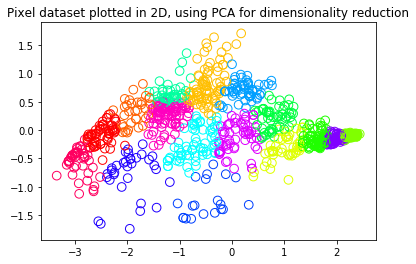

In [76]:
# Plot in 2D
plotDataPoints(Z[sel, :], idx[sel], K);
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');